**Portfolio Optimizer Using Python**

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import yfinance as yf
import requests

In [2]:
# Load data

url = 'https://www.slickcharts.com/sp500'

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

response = requests.get(url, headers=headers)

tables = pd.read_html(response.text)
df = tables[0]
stocks = df['Symbol'].tolist()
stocks = stocks[:50]

for index, stock in enumerate(stocks):
    if stock == 'BRK.B':
        stocks[index] = 'BRK-B'  

start_date = '2005-01-01'
end_date = '2023-01-01'

data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  50 of 50 completed


In [3]:
# Calculate daily returns

returns = data.pct_change()

In [4]:
# Portfolio Optimization

num_portfolios = 1000
all_weights = np.zeros((num_portfolios, len(stocks)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

# Monte Carlo Simulation

for ind in range(num_portfolios):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    all_weights[ind, :] = weights
    ret_arr[ind] = np.sum(returns.mean() * weights) * 252
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]    

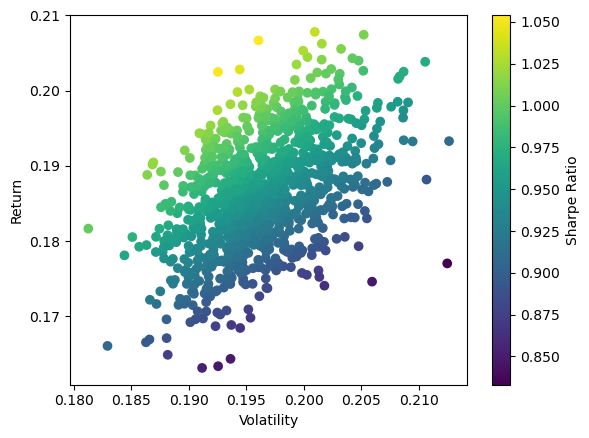

In [5]:
# Visualization

plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

In [6]:
# Optimize Portfolio

def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(returns.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sr = ret / vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

bounds = tuple((0, 1) for asset in range(len(stocks)))
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
init_guess = [0.25] * len(stocks)

opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

optimal_weights = opt_results.x
formatted_results = []

for stock, weight in zip(stocks, optimal_weights):
    formatted_results.append(f"{stock}: {weight*100:.2f}%")

formatted_output = ", ".join(formatted_results)
print(formatted_output)

AAPL: 14.80%, MSFT: 21.45%, AMZN: 0.00%, NVDA: 0.00%, GOOGL: 0.00%, GOOG: 0.00%, TSLA: 0.00%, META: 13.04%, BRK-B: 0.00%, XOM: 0.00%, LLY: 0.00%, UNH: 0.00%, JPM: 0.00%, V: 4.14%, JNJ: 0.00%, PG: 0.00%, AVGO: 0.00%, MA: 0.00%, HD: 0.00%, CVX: 0.00%, MRK: 0.00%, ABBV: 0.00%, ADBE: 0.00%, COST: 0.00%, PEP: 0.00%, CSCO: 0.00%, WMT: 0.00%, KO: 0.00%, CRM: 3.43%, ACN: 11.26%, MCD: 11.62%, TMO: 0.00%, NFLX: 0.00%, BAC: 0.00%, ORCL: 9.42%, PFE: 0.00%, LIN: 0.00%, CMCSA: 0.00%, ABT: 0.00%, AMD: 0.00%, DHR: 0.00%, INTC: 0.00%, INTU: 10.86%, WFC: 0.00%, TXN: 0.00%, DIS: 0.00%, COP: 0.00%, CAT: 0.00%, PM: 0.00%, VZ: 0.00%
